# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic_signs/train.p'
testing_file = 'traffic_signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(train['labels'])))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

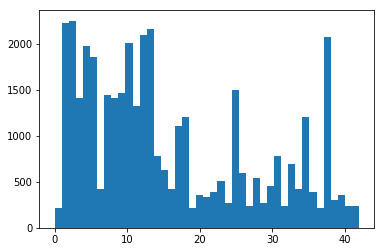

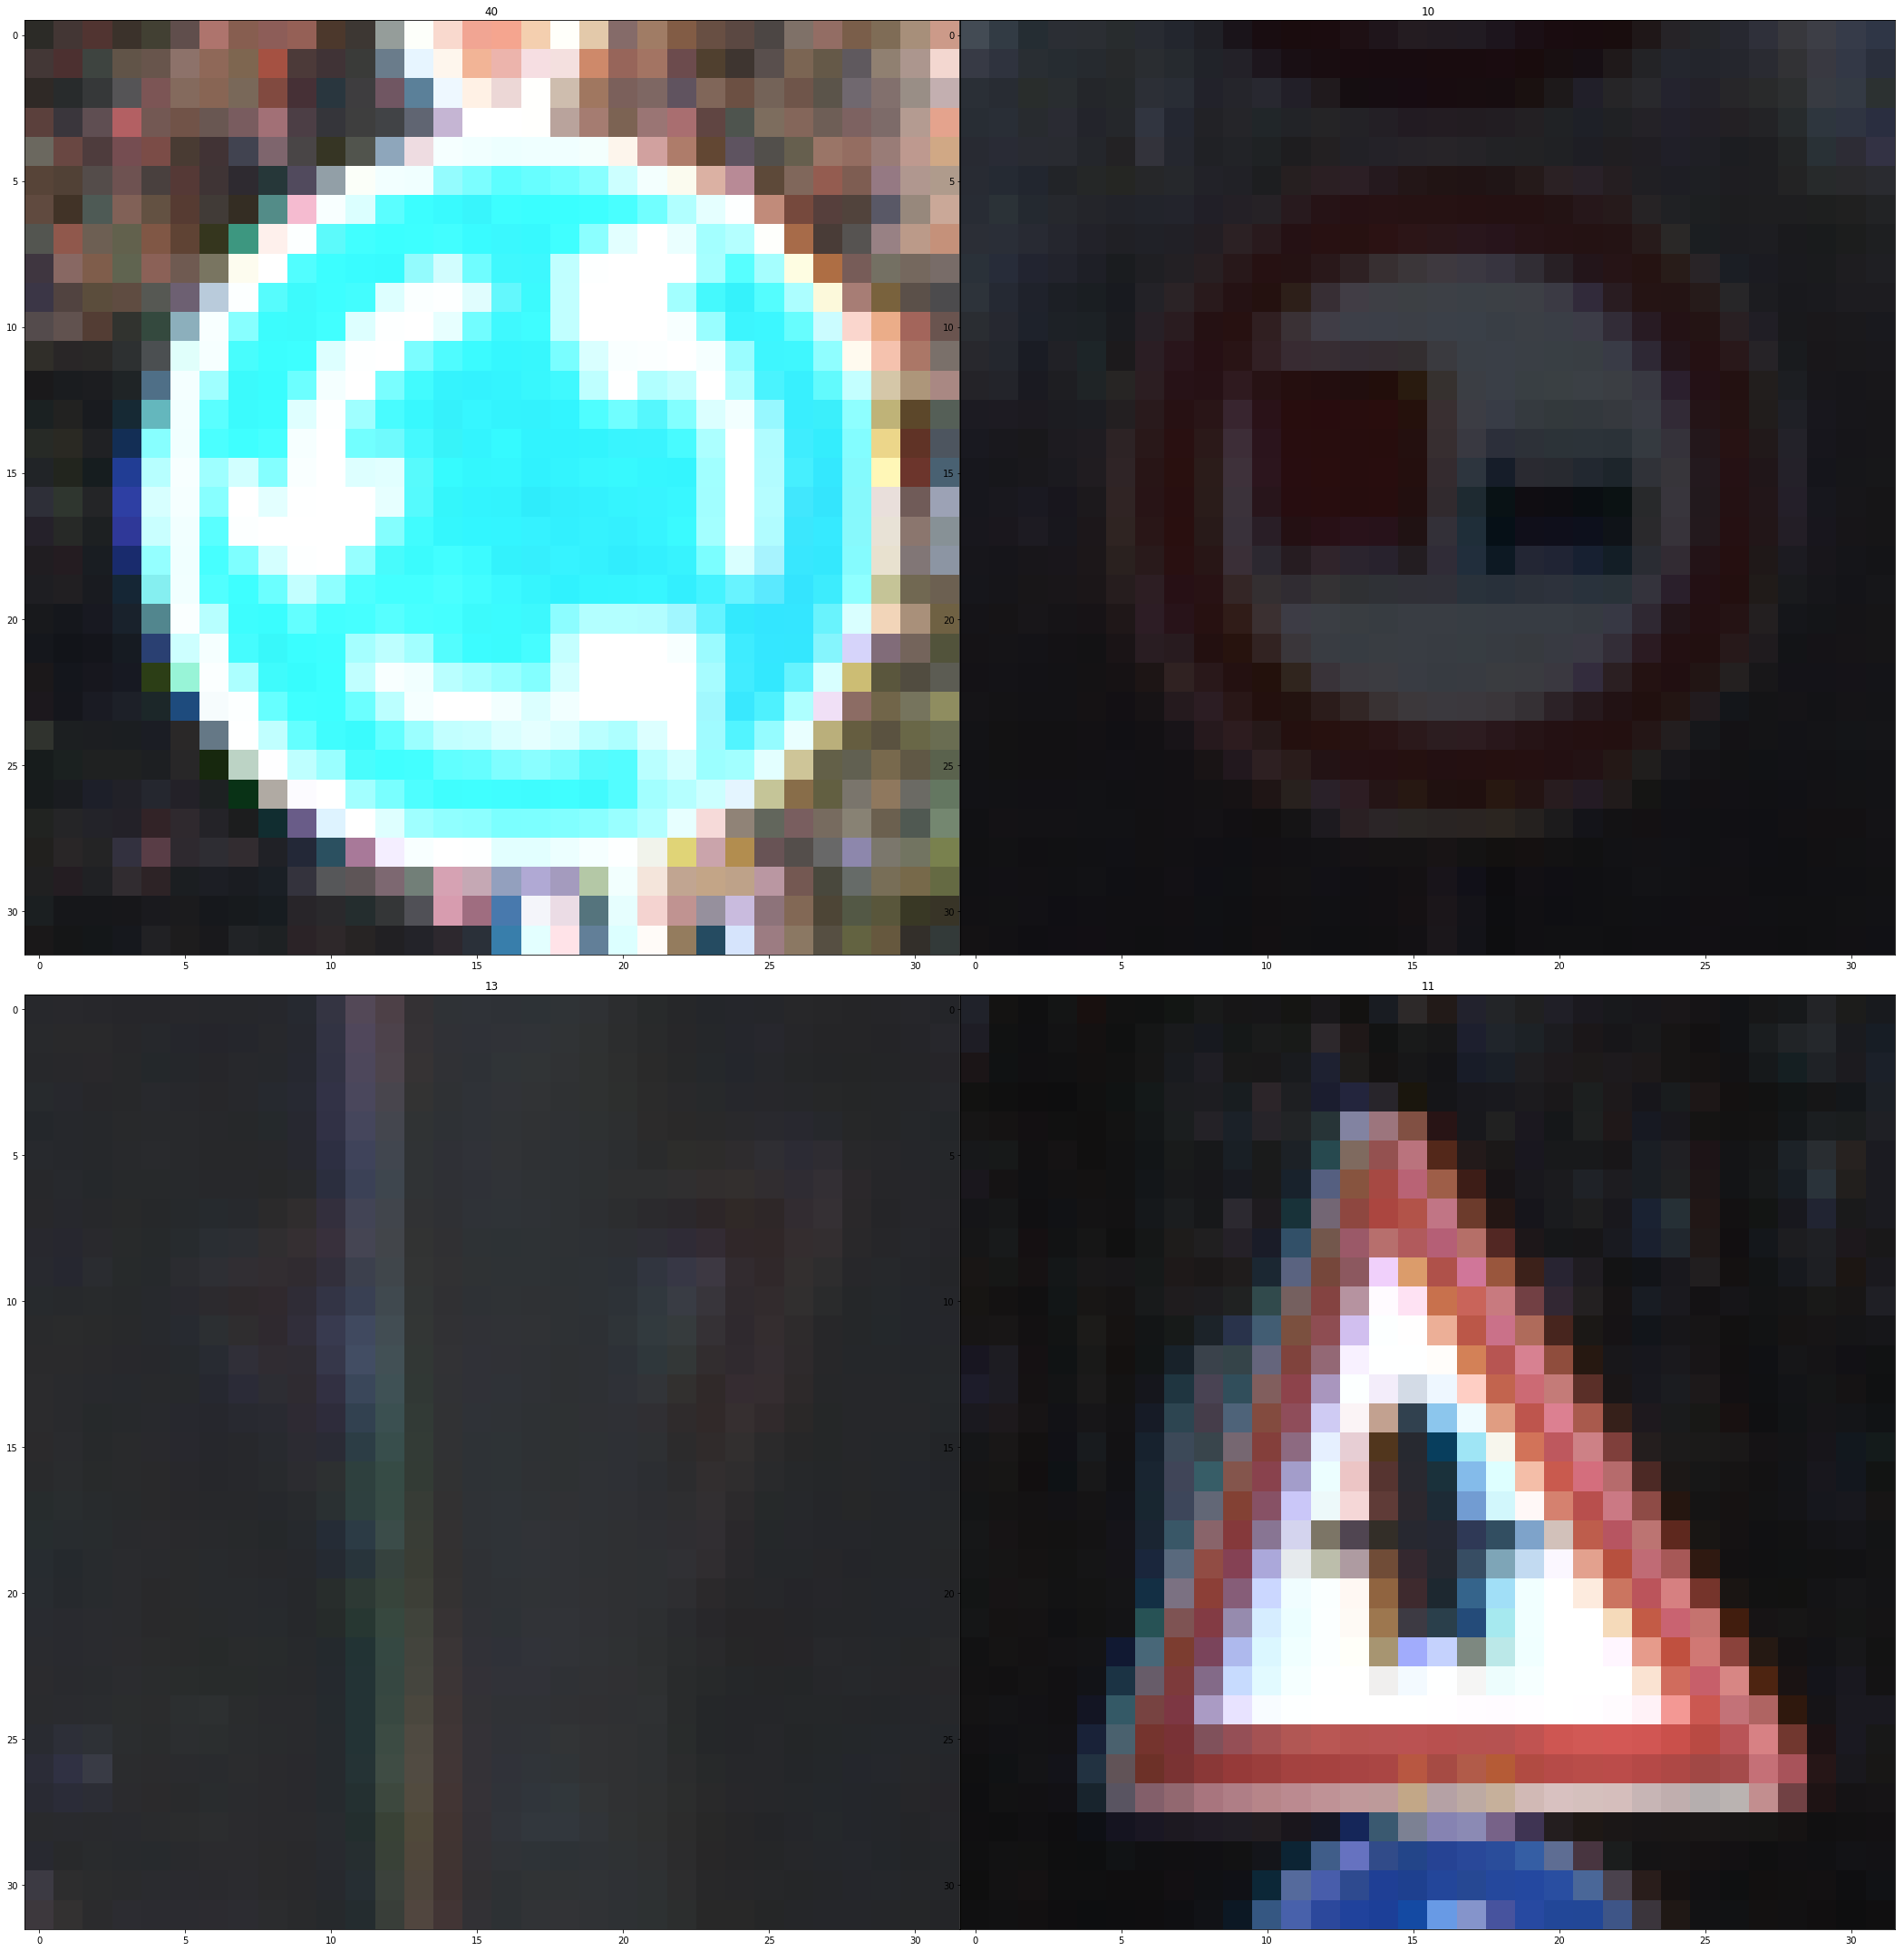

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(train['labels'], n_classes)

fig, axes = plt.subplots(2, 2, figsize=(30, 30))
fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax in axes.flat:
    index = np.random.randint(1,len(train['features']))
    ax.set_title(train['labels'][index])
    ax.imshow(train['features'][index])
    
plt.tight_layout()
    
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [4]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

#initializing the validation set

validation_length = int(np.ceil(len(X_train)/5))

X_validation = X_train[-validation_length:]
y_validation = y_train[-validation_length:]

#resizing the train set
X_train = X_train[:-validation_length]
y_train = y_train[:-validation_length]

print(len(X_validation))



7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I have generated the validation set. I took 7842 samples from the training set to make the validation set. The size of validation set is approximately one fith of the original training set.

I had no time to balance the classes - to make the histogram more flat, i.e. all classes are represented approximately in some quantaties.

I had the idea to make the augmentation through the image rotation, shifting, bluring, color and brightness transformation. But I ran the training procedure on the original dataset and the Validation Accuracy was rather high. Dew to lack of time I decided to contribute my solution trained on the original dataset w/o the augmentation.

The testing was performed on the test dataset.

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def my_LeNet(x):
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output=28x28x18. 
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 18), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(18))
    conv1   = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Layer 1: Activation
    conv1 = tf.nn.relu(conv1)
    
    #Layer 1: Pooling. Input = 28x28x18. Output = 14x14x18.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
                           
    #Layer 2: Convolutional. Input = 14x14x18. Output = 10x10x48.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 18, 48), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(48))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID')
                           
    #Layer 2: Activation
    conv2 = tf.nn.relu(conv2)
                           
    #Layer 2: Pooling. Input = 10x10x48. Output = 5x5x48.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Flatten. Input = 5x5x48. Output = 1200
    fc0 = flatten(conv2)
                           
    #Layer 3: Fully Connected. Input = 1200. Output = 400.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (1200, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
                         
    #Layer 3: Activation
    fc1 = tf.nn.relu(fc1)
                           
    #Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (400, 120), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(120))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
                         
    #Layer 4: Activation
    fc2 = tf.nn.relu(fc2)
                           
    #Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (120, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logit = tf.matmul(fc2, fc3_w) + fc3_b

                           
    return logit

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final architecture of my network is based on the LeNet-5 architecture with some dimensional adjustments.
There are two convolutional layers and three fully connected layers.

**Layer 1:**

Convolutional. Input = 32x32x3. Output=28x28x18. Filter size, strides and padding are similar to LeNet-5.

The input is the color image, so the input already has the depth equal to 3. Similar to LeNet-5 where one channel input was convoluted in 6 channel output I decided that 3 input channels should convolute into 18 output channels. I suppose that if the first layer trains to detect different edges in Red, Green and Blue channels, it will be rather reasonable because traffic signs actually have red and blue edges, and black and white edges. 

Activation function of Layer 1 is the Relu function.

Max_pooling function is applied similar to LeNet-5.

**Layer 2:**

Convolutional. Input = 14x14x18. Output = 10x10x48.

I supposed that in LeNet the Convolution from depth 6 to depth 16 means that the feature space dimension just expands in approx. 3 times, so I just set 48 = 16/6*18 outputs on the Layer 2.

We have more than just 10 classes, so we need more independent features to robustly distinguish all 43 classes of Traffic Signs.

Activation function of Layer 2 is the Relu function.

Max_pooling function is applied similar to LeNet-5.

After two convolutional layers there go two fully connected layers. We need to apply the flatten function in order to push the deep output from Layer 2 to input of Layer 3.

The output size of the flatten() function is equal to 1200.


**Layer 3:**
Fully connected layer. Input = 1200. Output = 400.
Simple linear transform is performed inside this layer.

The relation between the inputs and outputs is 3:1. The original LeNet-5 had relation 10:3

Activation function of Layer 3 is the Relu function.

**Layer 4:**
Fully connected layer. Input = 400. Output = 120.
Simple linear transform is performed inside this layer.

The relation between the inputs and outputs is 10:3.

Activation function of Layer 4 is the Relu function.

**Layer 5:**
Fully connected layer. Input = 120. Output = 43.
Simple linear transform is performed inside this layer.

Activation function of Layer 4 is the Relu function.

The output of Layer 5 is the logits representing the answer in one_hot notation.


In [96]:
### Train your model here.
### Feel free to use as many code cells as needed.



tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

#instead of one_hot
num_labels = 43
sparse_labels = tf.reshape(y, [-1, 1])
derived_size = tf.shape(sparse_labels)[0]
indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
concated = tf.concat(1, [indices, sparse_labels])
outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

rate = 0.0001

logits = my_LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
output = tf.nn.softmax(logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [10]:
print("Starting 1st session...")

rate = 0.0001

EPOCHS = 100
BATCH_SIZE = 70

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print("Rate = ", rate)
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            session.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)#substitue validation set
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(session, "D:\_my_scripts\CarND-Traffic-Sign-Classifier-Project\lenet_first")
    print("Model saved in file: %s" % save_path)

Starting 1st session...
Training...
Rate =  0.0001
EPOCH 1 ...
Validation Accuracy = 0.142
Learning rate = 0.0001

EPOCH 2 ...
Validation Accuracy = 0.234
Learning rate = 0.0001

EPOCH 3 ...
Validation Accuracy = 0.343
Learning rate = 0.0001

EPOCH 4 ...
Validation Accuracy = 0.405
Learning rate = 0.0001

EPOCH 5 ...
Validation Accuracy = 0.484
Learning rate = 0.0001

EPOCH 6 ...
Validation Accuracy = 0.555
Learning rate = 0.0001

EPOCH 7 ...
Validation Accuracy = 0.612
Learning rate = 0.0001

EPOCH 8 ...
Validation Accuracy = 0.657
Learning rate = 0.0001

EPOCH 9 ...
Validation Accuracy = 0.729
Learning rate = 0.0001

EPOCH 10 ...
Validation Accuracy = 0.763
Learning rate = 0.0001

EPOCH 11 ...
Validation Accuracy = 0.807
Learning rate = 0.0001

EPOCH 12 ...
Validation Accuracy = 0.839
Learning rate = 0.0001

EPOCH 13 ...
Validation Accuracy = 0.857
Learning rate = 0.0001

EPOCH 14 ...
Validation Accuracy = 0.883
Learning rate = 0.0001

EPOCH 15 ...
Validation Accuracy = 0.891
Learnin

In [84]:
print("Starting 2nd session...")

rate = 0.00001

EPOCHS = 100
BATCH_SIZE = 70

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    saver.restore(session, save_path)
    
    print("Training...")
    print("Rate = ", rate)
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            session.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(session, "D:\_my_scripts\CarND-Traffic-Sign-Classifier-Project\lenet_second")
    print("Model saved in file: %s" % save_path)

Starting 2nd session...
Training...
Rate =  1e-05
EPOCH 1 ...
Validation Accuracy = 0.983

EPOCH 2 ...
Validation Accuracy = 0.986

EPOCH 3 ...
Validation Accuracy = 0.980

EPOCH 4 ...
Validation Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.986

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.979

EPOCH 11 ...
Validation Accuracy = 0.984

EPOCH 12 ...
Validation Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.985

EPOCH 15 ...
Validation Accuracy = 0.983

EPOCH 16 ...
Validation Accuracy = 0.974

EPOCH 17 ...
Validation Accuracy = 0.982

EPOCH 18 ...
Validation Accuracy = 0.987

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.988

EPOCH 21 ...
Validation Accuracy = 0.988

EPOCH 22 ...
Validation Accuracy = 0.987

EPOCH 23 ...
Validation Accuracy = 

In [85]:
print("Starting 3rd session...")

rate = 0.000001

EPOCHS = 100
BATCH_SIZE = 70

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    saver.restore(session, save_path)
    
    print("Training...")
    print("Rate = ", rate)
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            session.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(session, "D:\_my_scripts\CarND-Traffic-Sign-Classifier-Project\lenet_third")
    print("Model saved in file: %s" % save_path)

Starting 3rd session...
Training...
Rate =  1e-06
EPOCH 1 ...
Validation Accuracy = 0.988

EPOCH 2 ...
Validation Accuracy = 0.988

EPOCH 3 ...
Validation Accuracy = 0.988

EPOCH 4 ...
Validation Accuracy = 0.988

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.987

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.981

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.984

EPOCH 13 ...
Validation Accuracy = 0.986

EPOCH 14 ...
Validation Accuracy = 0.987

EPOCH 15 ...
Validation Accuracy = 0.987

EPOCH 16 ...
Validation Accuracy = 0.988

EPOCH 17 ...
Validation Accuracy = 0.988

EPOCH 18 ...
Validation Accuracy = 0.988

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.988

EPOCH 21 ...
Validation Accuracy = 0.988

EPOCH 22 ...
Validation Accuracy = 0.988

EPOCH 23 ...
Validation Accuracy = 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used the LeNet-5 training procedure and made little modifications. I have trained the network in three sessions with different learning rate at each session. At the first training session the learning rate was 1.0e-4, at the second session the rate was 1.0e-5, and at the third session rate was 1.0e-6.

Hyperparameters were common for all sessions: mean = 0 and sigma = 0.1.

The optimizer used - tf.AdamOptimizer()

At every session I had 100 epochs with 70 images pew batch.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** My solution was based on LeNet-5 architecture. This architecture works well for grey images, so I decided to change the dimensions of all Layers and try to train network several times. The dimensions were linearly scaled to fit the number of output classes and number of input features.

During the training I looked at the Validation accuracy - if the progress was slow I tried to change the batch size of learning rate. After I obtained some good results after first session I tried to reduce the learning rate and continue training the model several times. It gave me approximately 0.5% of additional Validation accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)


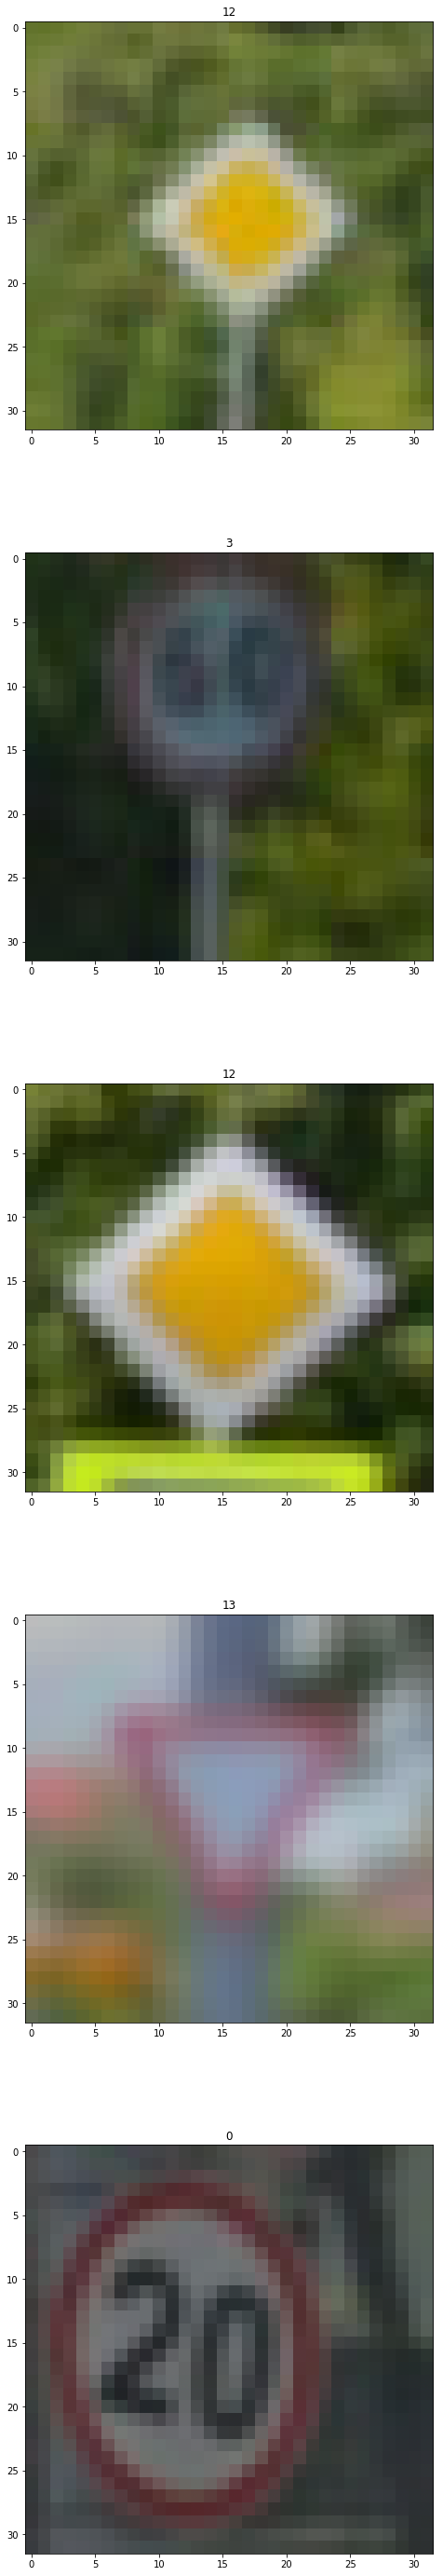

In [81]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
files = os.listdir('my_traffic_signs/')

import matplotlib.image as mpimg
import scipy.ndimage

X_my_signs = [] #list for my pictures

y_my_signs = [12, 3, 12, 13, 0]#labels for my pictures

for f in files:
    filename = 'my_traffic_signs/' + str(f)
    image = scipy.ndimage.imread(filename, mode='RGB')
    image = scipy.misc.imresize(image, (32,32))
    X_my_signs.append(image)
    print(image.shape)
    
X_my_signs = np.array(X_my_signs)#creating the numpy array from list
print(X_my_signs.shape)#checking the shape of array to fit the network input


fig, axes = plt.subplots(5, 1, figsize=(50, 50))
fig.subplots_adjust(hspace=0.3, wspace=0.05)

index = 0

for ax in axes.flat:
    ax.set_title(y_my_signs[index])
    ax.imshow(X_my_signs[index])
    index = index + 1
    


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Five candidate pictures ploted in previous section.

In my opinion the following particular qualities of the images might make classification difficult:

1) Perspective transformations of the road sign when we see it from some sharp angle - Example number 5 from provided dataset.
2) Local features caused by country laws - different standarts.
3) Different fonts.
4) Low quality of image - low resolution with noises.


In [97]:

save_path = 'D:\_my_scripts\CarND-Traffic-Sign-Classifier-Project\lenet_third'
print(save_path)

sess = tf.Session()
saver.restore(sess, save_path)

#result = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test})
print(X_my_signs[0:1].shape)
result = logits.eval(feed_dict={x: X_my_signs}, session=sess)

labels = np.argmax(result, axis=1)
print("Labels = ".format(labels))

print(y_my_signs - labels)

D:\_my_scripts\CarND-Traffic-Sign-Classifier-Project\lenet_third
(1, 32, 32, 3)
Labels = 
[  0 -10   0   0  -7]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I have obtained the 90% quality on Test set, and 60% on my own five pictures. And I was a little bit surprised that the trained network worked well on my local traffic signs.

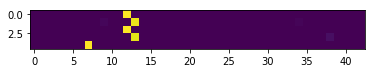

In [100]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

result = output.eval(feed_dict={x: X_my_signs}, session=sess)
#print(result)
plt.imshow(result)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [101]:
sess.run(tf.nn.top_k(tf.constant(result), k=5))

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.70139384e-01,   1.57074835e-02,   1.40037397e-02,
          1.48915424e-04,   4.02615143e-07],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.60125983e-01,   3.98740284e-02,   1.54829084e-11,
          1.52938241e-12,   1.03984699e-13],
       [  9.99989986e-01,   1.00591287e-05,   2.17497433e-08,
          1.20957466e-08,   8.62944916e-09]], dtype=float32), indices=array([[12,  0,  1,  2,  3],
       [13,  9, 34, 36, 41],
       [12,  0,  1,  2,  3],
       [13, 38,  3, 36, 41],
       [ 7,  1, 30, 25,  5]]))

**Answer:** Model is confident in all answers. The leading probabilities are all greater than 96%.

Answers number 1,3,4 are correct and confidence is very high. Answers number 2 and 5 are incorrect but confidence is also very high. There are no correct predictions in top k=5 for incorrect answers.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.